Using RK2 time stepping


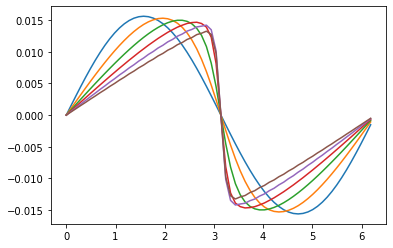

In [5]:
from numpy import *
import matplotlib.pyplot as plt

nu = 0.1; tf = 1; dt = 0.001; nsteps = int(tf/dt)
L = 2*pi; N = 64; h = L/N
j = arange(0,N); x = j*h
kx=linspace(0, N//2, N//2+1)

exp_factor_dtby2 = exp(-nu*kx**2*dt/2)
exp_factor = exp(-nu*kx**2*dt)

def comput_Nk(fk):
    f = fft.irfft(fk,N)*N
    f = f*f
    fk_prod = fft.rfft(f,N)/N
    return (1j*kx*fk_prod)
f = sin(x) # initiation condition
fk = fft.rfft(f,N)/N  # FT(f)
t=0.0
mark=0
while(t<tf+dt/2):
    Nk = comput_Nk(fk)
    fk_mid = (fk -(dt/2)*Nk)*exp_factor_dtby2
    Nk_mid = comput_Nk(fk_mid)
    fk = (fk -dt*Nk_mid)*exp_factor
    if(t+dt/2>mark):
        f=fft.irfft(fk,N)
        plt.plot(x,f)
        mark+=0.2
    t+=dt
plt.show()

KDv Equation:

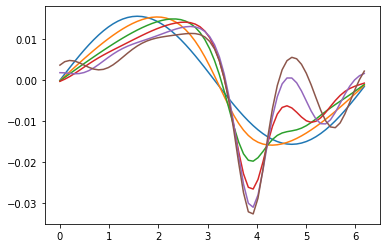

In [7]:
from numpy import *
import matplotlib.pyplot as plt

nu = 0.1; tf = 1; dt = 0.001; nsteps = int(tf/dt)
L = 2*pi; N = 64; h = L/N
j = arange(0,N); x = j*h
kx=linspace(0, N//2, N//2+1)

exp_factor_dtby2 = exp(-1j*nu*kx**3*dt/2)
exp_factor = exp(-1j*nu*kx**3*dt)

def comput_Nk(fk):
    f = fft.irfft(fk,N)*N
    f = f*f
    fk_prod = fft.rfft(f,N)/N
    return (1j*kx*fk_prod)
f = sin(x) # initiation condition
fk = fft.rfft(f,N)/N  # FT(f)
t=0.0
mark=0
while(t<tf+dt/2):
    Nk = comput_Nk(fk)
    fk_mid = (fk -(dt/2)*Nk)*exp_factor_dtby2
    Nk_mid = comput_Nk(fk_mid)
    fk = (fk -dt*Nk_mid)*exp_factor
    if(t+dt/2>mark):
        f=fft.irfft(fk,N)
        plt.plot(x,f)
        mark+=0.2
    t+=dt
plt.show()